<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 3.1.2 
# *Exploring Data*

## Part 1: Continuous and Categorical Data

When we explore a dataset we usually produce textual and graphical output together, starting with a high-level overview of the data and gradually drilling down into the individual features and relationships between them. 

Our most important libraries for this task are:

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Override default figure sizing:
pylab.rcParams['figure.figsize'] = (10, 6)
sns.set(color_codes = True)

## Data Profiling

We actually start profiling the data when we first load it and check for input errors, as in the last lab. Once we have a DataFrame we can work with, however, things start getting more interesting.

**Load the file "bikeshare.csv" into a DataFrame named `bikes`, and check that it was loaded properly:**

In [5]:
#ANSWER:
bikes = pd.read_csv("bikeshare.csv")
bikes.head()

instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

We may want our program to capture particular features of the dataset into variables, but if we just want to get a feel for the data it is easier to use a higher-level Pandas method like `describe()`:

**Use `describe` to get the description of datasets.**

In [6]:
#ANSWER:
bikes.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

### Continuous Data

We may have to do a lot of work before we can produce presentable graphics, but we can start creating simple visualisations as soon as we have a DataFrame. 

We usually start charting variables one-by-one (although when several have the same range it may be preferable to overlay them, using a different colour or symbol for each).

**Use the `scatter` method of Pandas to create a scatter plot of `windspeed`, `temp`:**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='windspeed', ylabel='temp'>

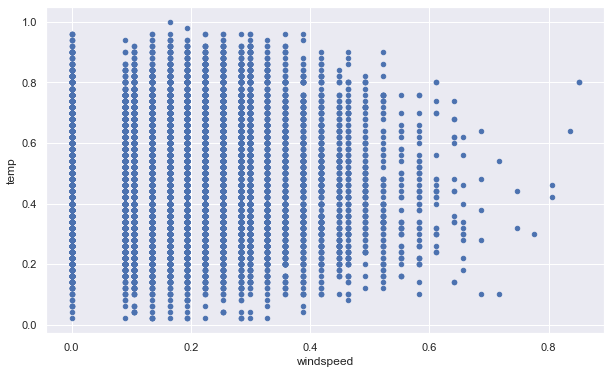

In [14]:
#ANSWER
bikes.plot.scatter(x='windspeed', y='temp')

**The `scatter` method has various parameters for controlling the appearance of the chart. Experiment with `s` , `linewidths`, and `alpha` below:**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='windspeed', ylabel='temp'>

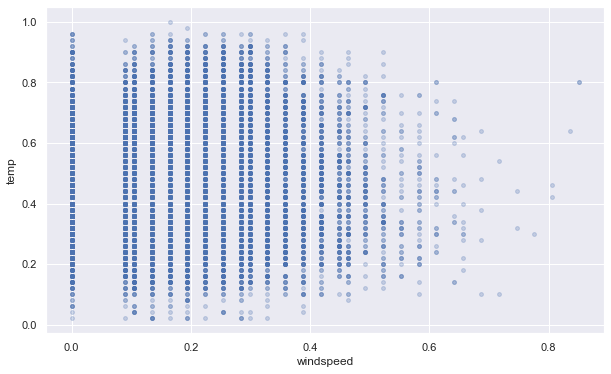

In [25]:
#ANSWER
bikes.plot.scatter(x='windspeed', y='temp', s = 15, linewidths = None, alpha = 0.25)

The scatterplot shows us the raw data. Our next step is usually to see how it is distributed, which is what the histogram is for: 

> A histogram is used for continuous data, where the bins represent ranges of data, while a bar chart is a plot of categorical variables. <sup>[1](#histfootnote)</sup>

- **Identify continuous varaibles**
- **Create histogram for those variables**

In [36]:
bikes.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
# Continuous variables are: 
# temp, atemp, hum, windspeed; [casual, registered, cnt - Not sure about these but I don't think so]

What do the horizontal and vertical axes represent?

In [ ]:
#ANSWER: Horizontal axes represent the values of the dataset distributed into a defined number of bins; vertical axes represent the number of values in each bin

(array([ 117.,  953., 2444., 2913., 2433., 2684., 3150., 1976.,  625.,
          84.]),
 array([0.02 , 0.118, 0.216, 0.314, 0.412, 0.51 , 0.608, 0.706, 0.804,
        0.902, 1.   ]),
 <BarContainer object of 10 artists>)

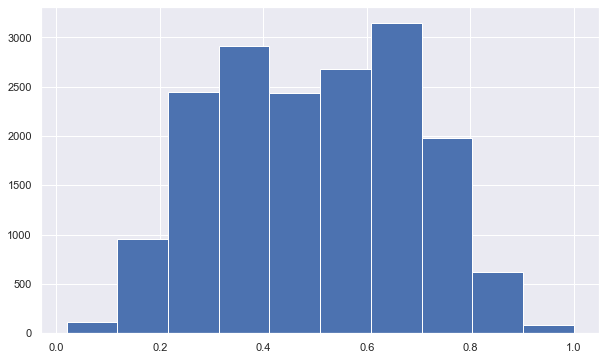

In [32]:
plt.hist(bikes.temp)

(array([  78.,  786., 2342., 2631., 3047., 3216., 3942., 1044.,  279.,
          14.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

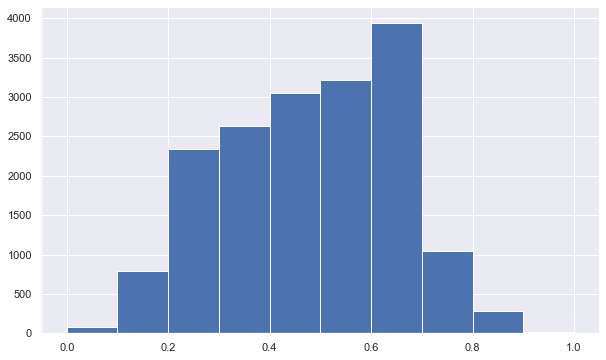

In [34]:
plt.hist(bikes.atemp)

(array([  23.,   55.,  696., 1481., 2641., 3084., 2940., 2384., 2900.,
        1175.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

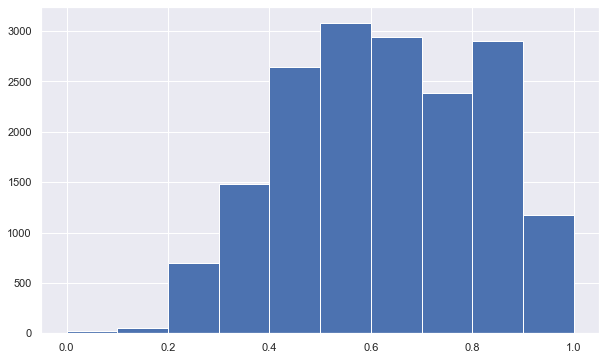

In [35]:
plt.hist(bikes.hum)

(array([2.180e+03, 6.475e+03, 4.465e+03, 2.458e+03, 1.137e+03, 4.340e+02,
        1.670e+02, 4.800e+01, 9.000e+00, 6.000e+00]),
 array([0.     , 0.08507, 0.17014, 0.25521, 0.34028, 0.42535, 0.51042,
        0.59549, 0.68056, 0.76563, 0.8507 ]),
 <BarContainer object of 10 artists>)

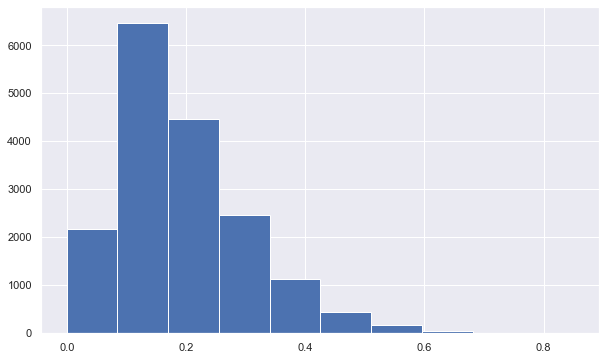

In [30]:
#ANSWER
plt.hist(bikes.windspeed, bins=10)

(array([11856.,  2985.,  1262.,   496.,   313.,   194.,   150.,    82.,
           28.,    13.]),
 array([  0. ,  36.7,  73.4, 110.1, 146.8, 183.5, 220.2, 256.9, 293.6,
        330.3, 367. ]),
 <BarContainer object of 10 artists>)

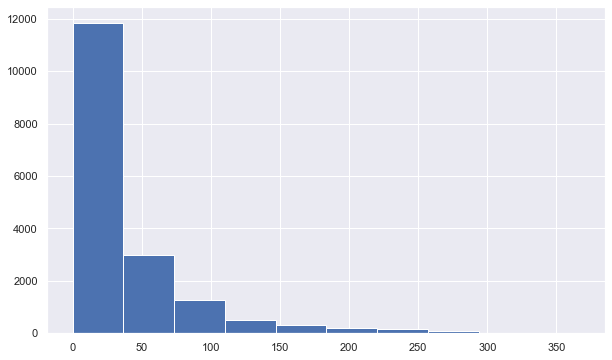

In [52]:
plt.hist(bikes.casual)

(array([7262., 4279., 2764., 1341.,  727.,  445.,  220.,  181.,  134.,
          26.]),
 array([  0. ,  88.6, 177.2, 265.8, 354.4, 443. , 531.6, 620.2, 708.8,
        797.4, 886. ]),
 <BarContainer object of 10 artists>)

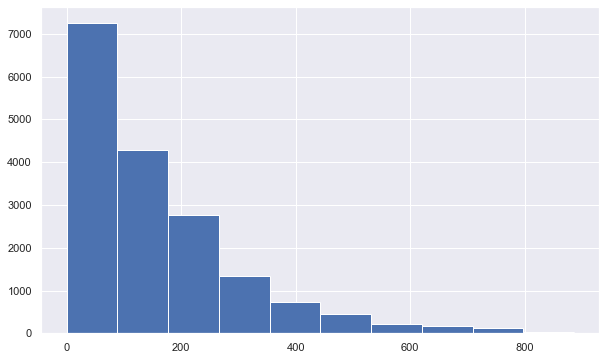

In [53]:
plt.hist(bikes.registered)

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <BarContainer object of 10 artists>)

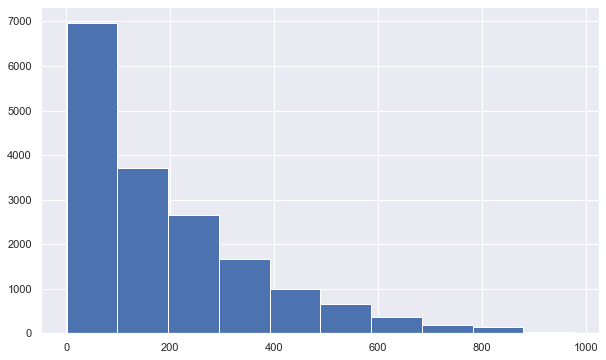

In [54]:
plt.hist(bikes.cnt)

#### ANSWER: 
    horiz = magnitude of `atemp`, apparently normalised to [0, 1], discretised into bins of width 0.1; 
    vertical = counts of samples in each bin.

*NOTE: Samples in a given bin are greater than the axis value of its left side and less than or equal to the axis value of its right side. (The left-most bin is an exception: it represents greater than or equal to.)*

The box-and-whisker plot provides a compact view of the major percentiles of the distribution:

**Make a box and whisker plot for the column ``atemp``.**  

> The box extends from the lower to
upper quartile values of the data, with a line at the median. The whiskers extend from the box to show the range of the data.  Flier points are those past the end of the whiskers.

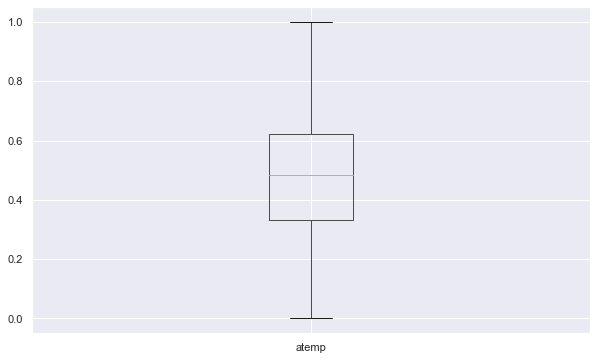

In [57]:
#ANSWER
boxplot = bikes.boxplot(column = 'atemp')

This kind of plot really shines when we want to show several distributions at once (as long as they have compatible ranges). 

**Plot `atemp` and `windspeed` together. Change labels accordingly.**

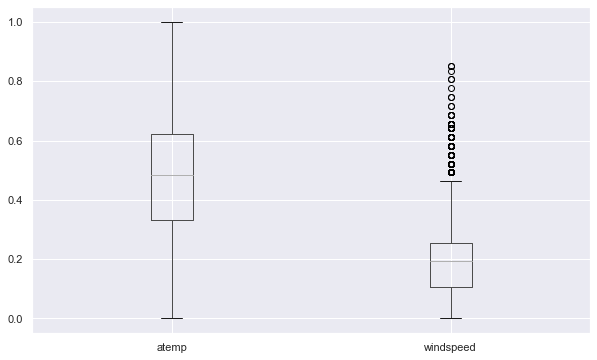

In [58]:
#ANSWER
boxplot = bikes.boxplot(column =['atemp', 'windspeed'])

### Classified Data

Samples may represent different classes according to one or more categorical variables. Sometimes our goal is to discover these classes, or to train a classification model from samples that have been manually classified.

Here, the famous "Iris" dataset gets loaded from the UCI repository:

In [59]:
import urllib

# get Iris dataset from UCI Machine Learning Repository:
url = "http://goo.gl/HppjFh" 
raw_data = urllib.request.urlopen(url)

# load the CSV file:
iris_data = pd.read_csv(raw_data, delimiter = ",", 
                        names = ('sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'))

Note that the column names were overridden by the `names` argument of the Pandas `read.csv` method. This requires prior knowledge of the dataset, which we would normally get from a data dictionary (although sometimes we just have to figure it out for ourselves).

**Print the first few rows of this DataFrame:**

In [60]:
#ANSWER
iris_data.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In this dataset, `species` has several possible values (representing the classes of the samples).

**Find out distinct number of `species` and number of sample for each `species` in this dataset.**

In [73]:
#ANSWER
print(iris_data['species'].nunique())
print(iris_data.species.value_counts())

3
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: species, dtype: int64


We often need to capture the number of classes in code. We can do this with a variation on the above. Try this below:

In [143]:
#ANSWER
len(iris_data['species'].unique())

3

We often need to calculate aggregate values within subgroups of the dataset. The Pandas DataFrame method for this is `groupby`. 

**Apply the `groupby` method to get `mean` of `sepal_length` and `sepal_width` for the above dataset.**

In [84]:
#ANSWER 
iris_data.groupby('sepal_width').sepal_length.mean()

sepal_width
2.0    5.000000
2.2    6.066667
2.3    5.325000
2.4    5.300000
2.5    5.762500
2.6    6.160000
2.7    5.855556
2.8    6.335714
2.9    6.060000
3.0    6.015385
3.1    5.941667
3.2    5.884615
3.3    6.016667
3.4    5.316667
3.5    5.150000
3.6    5.600000
3.7    5.266667
3.8    6.100000
3.9    5.400000
4.0    5.800000
4.1    5.200000
4.2    5.500000
4.4    5.700000
Name: sepal_length, dtype: float64

The Pandas `plot` method provides a quick way to produce a scatter plot.

**Draw a Scatterplot showing sepal width and length using the Pandas `plot` method.**

<AxesSubplot:xlabel='sepal_width'>

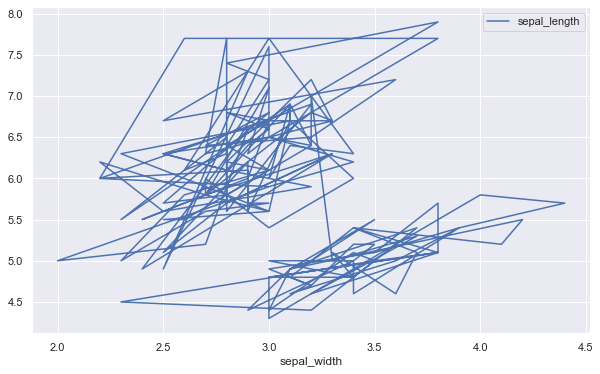

In [145]:
#ANSWER
iris_data.plot(x='sepal_width', y='sepal_length')

**Draw a Barplot showing sepal width and length using the Pandas plot method.**

<AxesSubplot:xlabel='sepal_width'>

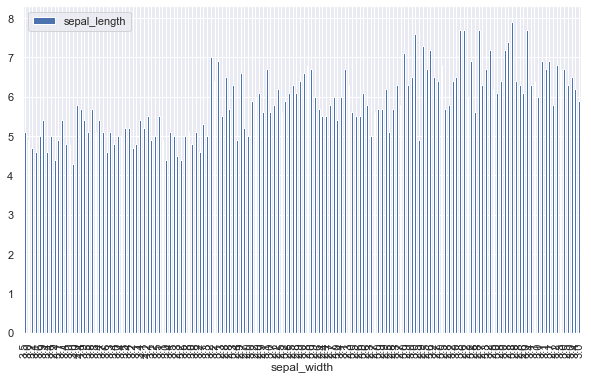

In [90]:
#ANSWER
iris_data.plot.bar(x='sepal_width', y='sepal_length')

Draw a Scatterplot showing sepal width and length using the Pandas plot method.

**[BONUS] Set `title`, `xlabel`, `ylabel` to the plot**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Sepal Width vs. Sepal Length')

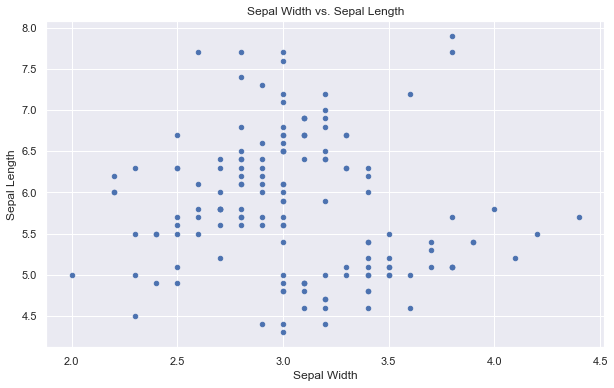

In [149]:
#ANSWER
iris_data.plot.scatter(x='sepal_width', y='sepal_length')
plt.xlabel('Sepal Width')
plt.ylabel('Sepal Length')
plt.title('Sepal Width vs. Sepal Length')

In this dataset we have also `petal_width`, `petal_length`. 

**Try to draw Scatterplot using these variables.**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='petal_width', ylabel='petal_length'>

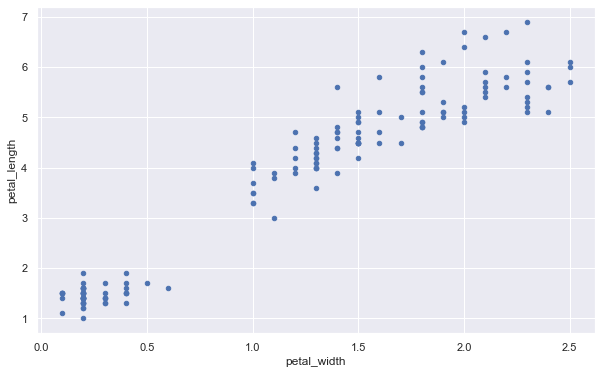

In [93]:
#ANSWER
iris_data.plot.scatter(x='petal_width', y='petal_length')

C:\Users\matt\.conda\envs\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


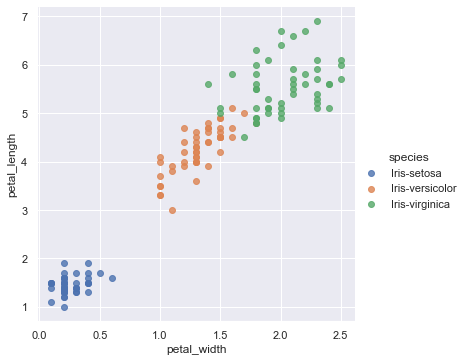

In [150]:
sns.lmplot("petal_width", "petal_length", data=iris_data, hue='species', fit_reg=False)

In this case, we already have different species, so we can colour the points accordingly. This is easy to do using the Seaborn library. Try using `lmplot` of seaborn library and use the parameter `hue` and `fit_reg = False`.

**Draw a Scatterplot showing sepal width and length.**

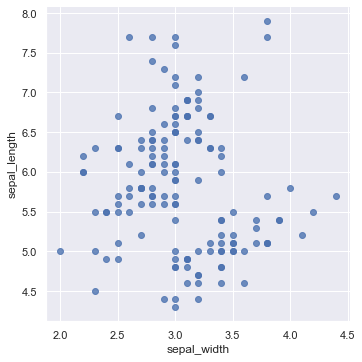

In [101]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:
sns.lmplot(x='sepal_width', y='sepal_length', data=iris_data, fit_reg = False)

**[BONUS] Draw a Scatterplot showing sepal width and length. Without using seaborn.**

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sepal_width', ylabel='sepal_length'>

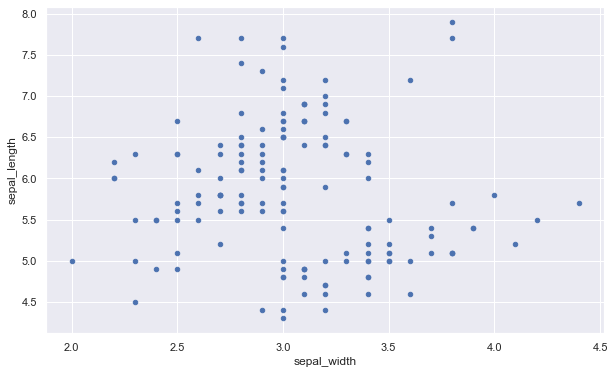

In [99]:
# ANSWER
iris_data.plot.scatter(x='sepal_width', y='sepal_length')

To find out why this function is called `lmplot`, try it again with `fit_reg` = True:

**Draw a Scatterplot showing sepal width and length:**

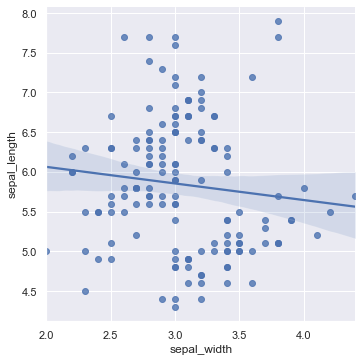

In [102]:
# ANSWER
# Draw a Scatterplot showing sepal width and length:
sns.lmplot(x='sepal_width', y='sepal_length', data=iris_data, fit_reg = True)

The Seaborn `jointplot` function charts a correlation along with both distributions:

**Draw a jointplot showing sepal width and length:**

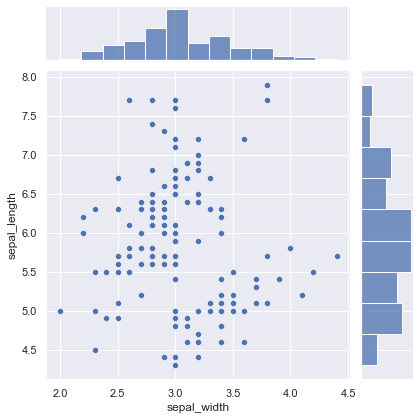

In [103]:
# ANSWER
sns.jointplot(x='sepal_width', y='sepal_length', data=iris_data)

When we want to see all the correlations at once, we can use `pairplot`:

**Draw a `pairplot` of the dataset:**

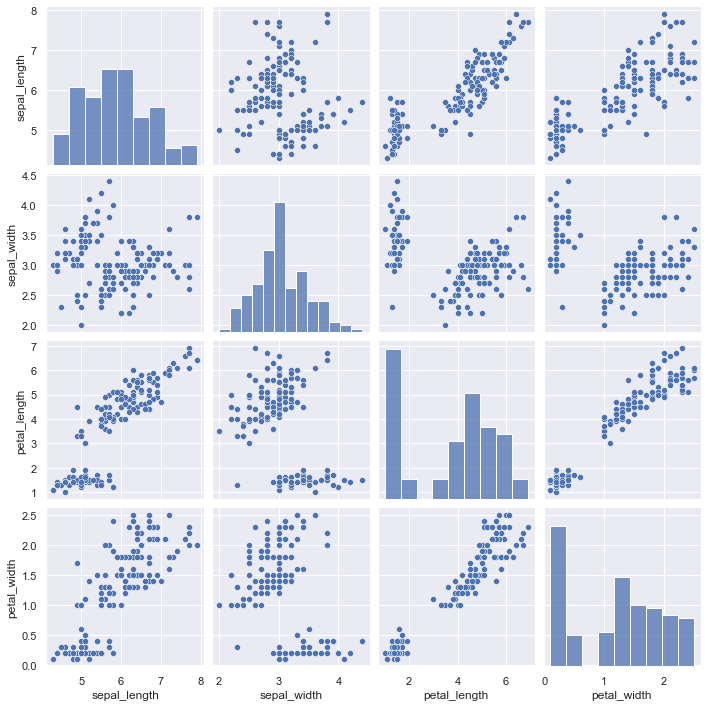

In [104]:
# ANSWER
sns.pairplot(iris_data)

And, if the classes are known, we can apply colour using the `hue` parameter. Try this below:

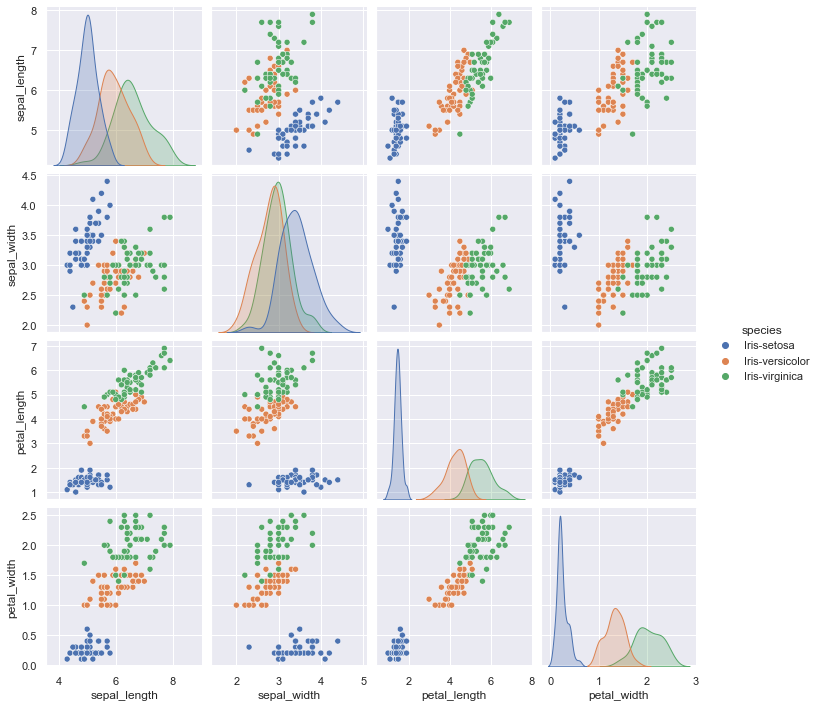

In [106]:
# ANSWER
sns.pairplot(iris_data, hue= "species")

Note that this gave us class-based distributions instead of an overall histogram, as well.

When we want to see numerical values of the correlations, the Pandas `corr` method provides a table of pair-wise correlations between the features in the DataFrame:

In [109]:
# ANSWER
iris_data.corr(method='pearson')

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000

### High-Level Data Profiling Libraries

We need to master the basic data profiling functions because we will by using them frequently, for exploring data and answering ad hoc questions. In a production solution, we may need to incorporate specific data profiling code into our script so that we can automate data cleaning. However, when we just want to examine the data interactively before we start modelling, it is easier to use a high-level library like the following:

> pip install pandas_profiling

In [111]:
# ANSWER
import pandas_profiling
df = pd.read_csv("Meteorite_Landings.csv", parse_dates = ['year'], encoding = 'UTF-8')
df.head(10)

name   id nametype     recclass  mass (g)  fall  \
0               Aachen    1    Valid           L5      21.0  Fell   
1               Aarhus    2    Valid           H6     720.0  Fell   
2                 Abee    6    Valid          EH4  107000.0  Fell   
3             Acapulco   10    Valid  Acapulcoite    1914.0  Fell   
4              Achiras  370    Valid           L6     780.0  Fell   
5             Adhi Kot  379    Valid          EH4    4239.0  Fell   
6  Adzhi-Bogdo (stone)  390    Valid        LL3-6     910.0  Fell   
7                 Agen  392    Valid           H5   30000.0  Fell   
8               Aguada  398    Valid           L6    1620.0  Fell   
9        Aguila Blanca  417    Valid            L    1440.0  Fell   

                     year    reclat    reclong               GeoLocation  
0  01/01/1880 12:00:00 AM  50.77500    6.08333     (50.775000, 6.083330)  
1  01/01/1951 12:00:00 AM  56.18333   10.23333    (56.183330, 10.233330)  
2  01/01/1952 12:00:00 AM  54.21667 -113.00000  (54.216670, -113.000000)  
3  01/01/1976 12:00:00 AM  16.88333  -99.90000   (16.883330, -99.900000)  
4  01/01/1902 12:00:00 AM -33.16667  -64.95000  (-33.166670, -64.950000)  
5  01/01/1919 12:00:00 AM  32.10000   71.80000    (32.100000, 71.800000)  
6  01/01/1949 12:00:00 AM  44.83333   95.16667    (44.833330, 95.166670)  
7  01/01/1814 12:00:00 AM  44.21667    0.61667     (44.216670, 0.616670)  
8  01/01/1930 12:00:00 AM -31.60000  -65.23333  (-31.600000, -65.233330)  
9  01/01/1920 12:00:00 AM -30.86667  -64.55000  (-30.866670, -64.550000)

Use `ProfileReport` of `pandas_profiling` to get the overview of the dataset.

In [112]:
# ANSWER
df.profile_report()


Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [113]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

For **HOMEWORK**: check out the `pydqc` library.

## Part 2: Time Series and Geospatial Data

## Time Series

A time series is basically a series or a data frame with a time-based index column. Working with time series introduces a lot of challenges and possibilities, but most tasks are catered for by the standard libraries in Python.

Here is a history of air passenger counts by month, loaded into an ordinary DataFrame:

In [14]:
airpass = pd.read_csv('AirPassengers.csv')
airpass.head()

TravelDate  Passengers
0   1/1/1949         112
1   2/1/1949         118
2   3/1/1949         132
3   4/1/1949         129
4   5/1/1949         121

In [15]:
airpass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   TravelDate  144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [17]:
airpass['TravelDate']

0       1/1/1949
1       2/1/1949
2       3/1/1949
3       4/1/1949
4       5/1/1949
         ...    
139     8/1/1960
140     9/1/1960
141    10/1/1960
142    11/1/1960
143    12/1/1960
Name: TravelDate, Length: 144, dtype: object

Before going any further, the `TravelDate` column needs to be converted to the `datetime` type.

In [29]:
# ANSWER
airpass['TravelDate'] = pd.to_datetime(airpass['TravelDate'])

Set `TravelDate` as index

In [30]:
airpass.head()

TravelDate  Passengers
0 1949-01-01         112
1 1949-02-01         118
2 1949-03-01         132
3 1949-04-01         129
4 1949-05-01         121

In [32]:
airpass.dtypes

TravelDate    datetime64[ns]
Passengers             int64
dtype: object

In [34]:
# ANSWER
airpass_travel_index = airpass.set_index('TravelDate')
airpass_travel_index

Passengers
TravelDate            
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]

Now, Pandas knows that the first column of this DataFrame is a datetime index, so it only shows one column of data:

Use `head` to check.

In [35]:
# ANSWER
airpass_travel_index.head()

Passengers
TravelDate            
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121

Here's how to see the values of the index:

In [46]:
airpass.index

RangeIndex(start=0, stop=144, step=1)

If we had multiple data columns but we only wanted to work with a time series of one of them, we could pull that column into a 1D time series:

In [47]:
ts = airpass_travel_index['Passengers']

We use the datetime index exactly like a row number index:

In [48]:
print(ts['1949-01-01'])

112


Or, we can refer to the row by its datetime equivalent:

In [49]:
from datetime import datetime
print(ts[datetime(1949,1,1)])

112


Happily, Pandas makes it easy to slice data at a courser grain. We can refer to a whole year of data by omitting the month and day form the index:

In [50]:
print(ts['1949'])

TravelDate
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: Passengers, dtype: int64


The most basic way to plot a time series is to let Pandas apply the default:

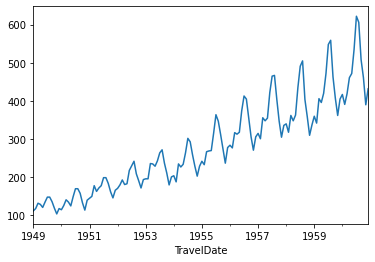

In [51]:
ts.plot();

## Geospatial Data

Geospatial data is map-based (although what constitutes a "map" can go beyond the familiar). Ultimately, geographic data  occurs either in bitmap (raster) form or vector (resizeable polygons). It is not unusual for the two kinds of data to be used together.

Because borders are often complex, following river courses, mountain ranges, and so on, the files that describe their geometries can be large. To reduce file sizes and image rendering times, we prefer to work with polygons that are no more detailed than the maximum resolution we need for our task. For this reason, geospatial files are often available at several different resolutions.

There are several popular options for working with maps in Python. We will use folium for its breadth and its use of open-source data.

In [88]:
import folium
from datetime import datetime
from IPython.display import display

In [12]:
# Read SF Incidents data
crime_csv = pd.read_csv('SFPD_Incidents-Current_Year_2015.csv')

In [13]:
crime_csv.head()

IncidntNum      Category                         Descript DayOfWeek  \
0   150827188  NON-CRIMINAL     AIDED CASE, MENTAL DISTURBED    Sunday   
1   150827213       ASSAULT      INFLICT INJURY ON COHABITEE    Sunday   
2   150827213       ASSAULT  ATTEMPTED HOMICIDE WITH A KNIFE    Sunday   
3   150827213       ASSAULT           CHILD ABUSE (PHYSICAL)    Sunday   
4   150827213       ASSAULT              MAYHEM WITH A KNIFE    Sunday   

         Date   Time PdDistrict      Resolution                   Address  \
0  09/20/2015  23:54   RICHMOND       UNFOUNDED  3000 Block of CLEMENT ST   
1  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   
2  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   
3  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   
4  09/20/2015  23:45  INGLESIDE  ARREST, BOOKED     100 Block of LOEHR ST   

            X          Y                               Location  
0 -122.491851  37.781756  (37.7817557255921, -122.491851328976)  
1 -122.413676  37.712617  (37.7126165766239, -122.413676487435)  
2 -122.413676  37.712617  (37.7126165766239, -122.413676487435)  
3 -122.413676  37.712617  (37.7126165766239, -122.413676487435)  
4 -122.413676  37.712617  (37.7126165766239, -122.413676487435)

In [53]:
print(crime_csv["Date"].min())
print(crime_csv["Date"].max())

2015-01-02 00:00:00
2015-09-20 00:00:00


In [21]:
crime_csv['Date'] = pd.to_datetime(crime_csv['Date'])

Convert `Date` Column to DateTime and set as index 

In [22]:
# ANSWER
crimes = crime_csv.set_index('Date')
crimes.head()

IncidntNum      Category                         Descript  \
Date                                                                    
2015-09-20   150827188  NON-CRIMINAL     AIDED CASE, MENTAL DISTURBED   
2015-09-20   150827213       ASSAULT      INFLICT INJURY ON COHABITEE   
2015-09-20   150827213       ASSAULT  ATTEMPTED HOMICIDE WITH A KNIFE   
2015-09-20   150827213       ASSAULT           CHILD ABUSE (PHYSICAL)   
2015-09-20   150827213       ASSAULT              MAYHEM WITH A KNIFE   

           DayOfWeek   Time PdDistrict      Resolution  \
Date                                                     
2015-09-20    Sunday  23:54   RICHMOND       UNFOUNDED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   

                             Address           X          Y  \
Date                                                          
2015-09-20  3000 Block of CLEMENT ST -122.491851  37.781756   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   

                                         Location  
Date                                               
2015-09-20  (37.7817557255921, -122.491851328976)  
2015-09-20  (37.7126165766239, -122.413676487435)  
2015-09-20  (37.7126165766239, -122.413676487435)  
2015-09-20  (37.7126165766239, -122.413676487435)  
2015-09-20  (37.7126165766239, -122.413676487435)

Draw a timeseries plot to visualize number of crimes for each day.

In [43]:
incidents = crimes.index.value_counts()
crimes['incidents'] = incidents

In [49]:
crimes.head()

IncidntNum      Category                         Descript  \
Date                                                                    
2015-09-20   150827188  NON-CRIMINAL     AIDED CASE, MENTAL DISTURBED   
2015-09-20   150827213       ASSAULT      INFLICT INJURY ON COHABITEE   
2015-09-20   150827213       ASSAULT  ATTEMPTED HOMICIDE WITH A KNIFE   
2015-09-20   150827213       ASSAULT           CHILD ABUSE (PHYSICAL)   
2015-09-20   150827213       ASSAULT              MAYHEM WITH A KNIFE   

           DayOfWeek   Time PdDistrict      Resolution  \
Date                                                     
2015-09-20    Sunday  23:54   RICHMOND       UNFOUNDED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   
2015-09-20    Sunday  23:45  INGLESIDE  ARREST, BOOKED   

                             Address           X          Y  \
Date                                                          
2015-09-20  3000 Block of CLEMENT ST -122.491851  37.781756   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   
2015-09-20     100 Block of LOEHR ST -122.413676  37.712617   

                                         Location  incidents  
Date                                                          
2015-09-20  (37.7817557255921, -122.491851328976)        392  
2015-09-20  (37.7126165766239, -122.413676487435)        392  
2015-09-20  (37.7126165766239, -122.413676487435)        392  
2015-09-20  (37.7126165766239, -122.413676487435)        392  
2015-09-20  (37.7126165766239, -122.413676487435)        392

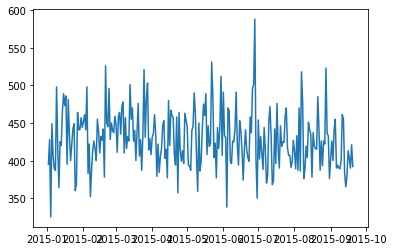

In [60]:
# ANSWER
plt.plot(crimes.index, crimes.incidents)

Using folium we can easily create a map. As it's SF data, by default we are using SF location.

In [69]:
def generateBaseMap(default_location=[37.76, -122.45], default_zoom_start=12):
    '''
    Create a base map
    '''
    base_map = folium.Map(
        location = default_location
        , control_scale = True
        , zoom_start = default_zoom_start
    )
    
    return base_map

In [70]:
base_map = generateBaseMap(default_location=[37.76, -122.45])
display(base_map)

Add a marker in the map using `Folium.Marker` for first 100 rows of the dataset.

In [132]:
# ANSWER
marker = folium.Marker(location= [crimes['Y'][0], crimes['X'][0]]).add_to(base_map) 
marker1 = folium.Marker(location= [crimes['Y'][1], crimes['X'][1]]).add_to(base_map) 
base_map

In [145]:
##Finally got it to work
for i in range(100):
        folium.Marker(location= [crimes['Y'][i], crimes['X'][i]]).add_to(base_map) 
    
base_map

In [64]:
print('folium: ', folium.__version__)

folium:  0.12.0


Add a cricle in the map using `Folium Circle` for first 100 rows of the dataset.

In [149]:
# ANSWER
for i in range(100):
        folium.Circle(location= [crimes['Y'][i], crimes['X'][i]], radius = 200).add_to(base_map) 
    
base_map

[BONUS] Create a heatmap of the incident happened in SF.

In [150]:
HeatMap(crimes).add_to(base_map)
base_map

NameError: name 'HeatMap' is not defined

**HOMEWORK** Explore Folium as mush as you can.

**HOMEWORK** Explore GeoPandas

# More Resources

<a name="histfootnote">1</a>: [Histogram](https://en.wikipedia.org/wiki/Histogram)

The matplotlib users' guide is at http://pageperso.lif.univ-mrs.fr/~francois.denis/IAAM1/Matplotlib.pdf.

For visualisation ideas and code see https://python-graph-gallery.com/:

In [0]:
# GeoPandas

> The goal of GeoPandas is to make working with geospatial data in python easier. It combines the capabilities of pandas and shapely, providing geospatial operations in pandas and a high-level interface to multiple geometries to shapely. GeoPandas enables you to easily do operations in python that would otherwise require a spatial database such as PostGIS.

[GeoPandas 0.4.0](http://geopandas.org/index.html#)



---



---



> > > > > > > > > © 2019 Institute of Data


---



---





In [138]:
sns.load_dataset("flights")

year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]